<a href="https://colab.research.google.com/github/Shalha-Mucha18/Spam-Mail-Prediction/blob/main/spam_mail_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries

In [ ]:
#for handling data
import numpy as np
import pandas as pd

#Visualization data
import matplotlib.pyplot as plt
import seaborn as sns
#ml
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

#Accuracy metrices
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix


Data collection and pre-processing

In [ ]:
#load data from csv file to dataframe
df=pd.read_csv("/content/mail_data.csv")
print(df)

     Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [ ]:
df.shape

(5572, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
#finding the nan value
df.isna().sum()

Category    0
Message     0
dtype: int64

In [ ]:
#replace the null values with the null strings
mail_data=df.where((pd.notnull(df)),'')

In [ ]:
#printing the new dataferame
mail_data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


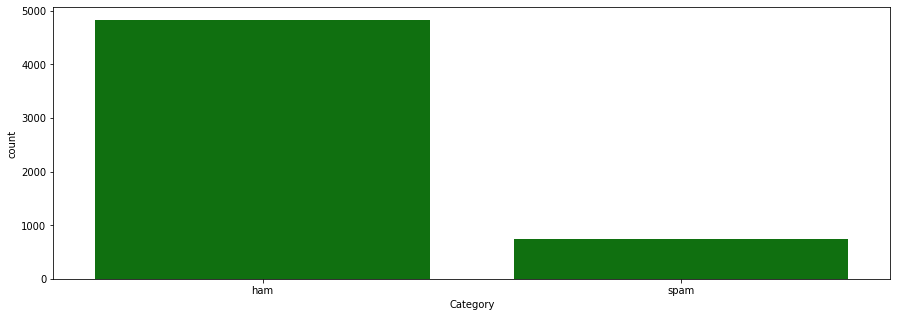

In [ ]:
#visualize the mail data using bar plot
plt.figure(figsize = (15, 5))
sns.countplot(data=mail_data,x='Category',color='green')


In [ ]:
#Lets see few example of mail data
for r in mail_data.iterrows():
  print('Mail Catagory :{}\nMail :\n{}\n\n'.format(r[1][0],r[1][1]))
  if r[0]==5:break

Mail Catagory :ham
Mail :
Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


Mail Catagory :ham
Mail :
Ok lar... Joking wif u oni...


Mail Catagory :spam
Mail :
Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


Mail Catagory :ham
Mail :
U dun say so early hor... U c already then say...


Mail Catagory :ham
Mail :
Nah I don't think he goes to usf, he lives around here though


Mail Catagory :spam
Mail :
FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv




Label Encoding

Spam -->0

ham -->1

In [ ]:
#label spam as 0,ham as 1
mail_data.loc[mail_data['Category']=='spam','catagory']=0
mail_data.loc[mail_data['Category']=='ham','catagory']=1

,Category,Message,catagory
0,ham,"Go until jurong point, crazy.. Available only ...",1.0
1,ham,Ok lar... Joking wif u oni...,1.0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,0.0
3,ham,U dun say so early hor... U c already then say...,1.0
4,ham,"Nah I don't think he goes to usf, he lives aro...",1.0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,0.0
5568,ham,Will ü b going to esplanade fr home?,1.0
5569,ham,"Pity, * was in mood for that. So...any other s...",1.0
5570,ham,The guy did some bitching but I acted like i'd...,1.0


In [ ]:
mail_data.drop(['Catagory'],axis=1).head()

,Category,Message,catagory
0,ham,"Go until jurong point, crazy.. Available only ...",1.0
1,ham,Ok lar... Joking wif u oni...,1.0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,0.0
3,ham,U dun say so early hor... U c already then say...,1.0
4,ham,"Nah I don't think he goes to usf, he lives aro...",1.0


In [ ]:
#split the data into x,y
x=mail_data.loc[:,'Message']
y=mail_data.loc[:,'catagory']

In [ ]:
print(x)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object


In [ ]:
print(y)

0       1.0
1       1.0
2       0.0
3       1.0
4       1.0
       ... 
5567    0.0
5568    1.0
5569    1.0
5570    1.0
5571    1.0
Name: catagory, Length: 5572, dtype: float64


Spliting data into training data and test data

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=11)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(4457,)
(4457,)
(1115,)
(1115,)


Feature extraction

In [ ]:
#transform test data to feature vector
f_extraction=TfidfVectorizer(min_df=1,stop_words='english',lowercase=True)
x_train_feature=f_extraction.fit_transform(x_train)
x_test_feature=f_extraction.transform(x_test)
  #convert y_traun and y_test as integers
y_train=y_train.astype('int')
y_test=y_test.astype('int')

In [ ]:
x_train_feature

<4457x7505 sparse matrix of type '<class 'numpy.float64'>'
	with 35122 stored elements in Compressed Sparse Row format>

Training the model with Logistic Regression

In [ ]:
model=LogisticRegression()

model.fit(x_train_feature,y_train)

LogisticRegression()

Evaluating the trained model

In [ ]:
#predicting on the training data
y_predecting_on_train_data=model.predict(x_train_feature)
print('Accuracy on train data',accuracy_score(y_train,y_predecting_on_train_data))

Accuracy on train data 0.9683643706529056


In [ ]:
#predicting on the test data
y_predecting_on_test_data=model.predict(x_test_feature)
print('Accuracy on test data',accuracy_score(y_test,y_predecting_on_test_data))

Accuracy on test data 0.9659192825112107


Building a predective system

In [ ]:
input_mail=['You won 1000$ prize money in lottery.']
input_feature=f_extraction.transform(input_mail)
predict_on_input_mail=model.predict(input_feature)
if predict_on_input_mail[0]==1:
  print('Ham mail')
else:
  print('Spam mail')


Spam mail
